In [12]:
import gym
import neat
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('MountainCar-v0')

## JENOM MALY TESTIK S MOUNTAIN CAR

def eval_genomes(genomes, genome_config):
    for _, genome in genomes:
        total_reward = 0
        genome.fitness = 0
        net = neat.nn.FeedForwardNetwork.create(genome, genome_config)
        observation = env.reset()[0]

        action = net.activate(observation)

        terminated, truncated = False, False

        while not terminated and not truncated:

            observation, reward, terminated, truncated, _ = env.step(np.argmax(action))

            action = net.activate(observation)

            momentum += observation[1] + observation[0]

            if terminated or truncated:
                break
        genome.fitness = momentum


config_path = 'mountain-car'  # Update with your NEAT configuration file path
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

population = neat.Population(config)
population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

winner = population.run(eval_genomes, 200)



 ****** Running generation 0 ****** 



C:\Users\Mazi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Population's average fitness: -200.00000 stdev: 0.00000
Best fitness: -200.00000 - size: (3, 6) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 1.140, standard deviation 0.270
Population of 200 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   200   -200.0    0.000     0
Total extinctions: 0
Generation time: 1.991 sec

 ****** Running generation 1 ****** 

Population's average fitness: -200.00000 stdev: 0.00000
Best fitness: -200.00000 - size: (3, 6) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 1.255, standard deviation 0.287
Population of 200 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   200   -200.0    0.000     1
Total extinctions: 0
Generation time: 1.917 sec (1.954 average)

 ****** Running generation 2 ****** 

Population's average fitness: -200.00000 stdev: 0.00000
Best fitness: -200.0

In [ ]:
env = gym.make('MountainCar-v0', render_mode="human")
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
terminated, truncated = False, False
observation =  env.reset()[0]
while not terminated and not truncated:
    neural_network_output = winner_net.activate(observation)
    action = np.argmax(neural_network_output)
    observation, reward, terminated, truncated, _ = env.step(action)
env.close()

In [ ]:
import visualize

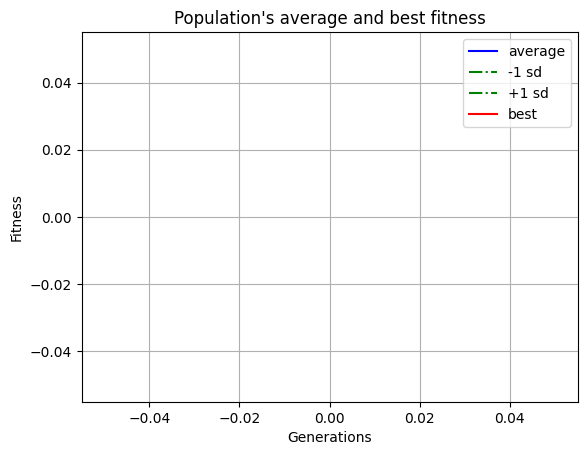

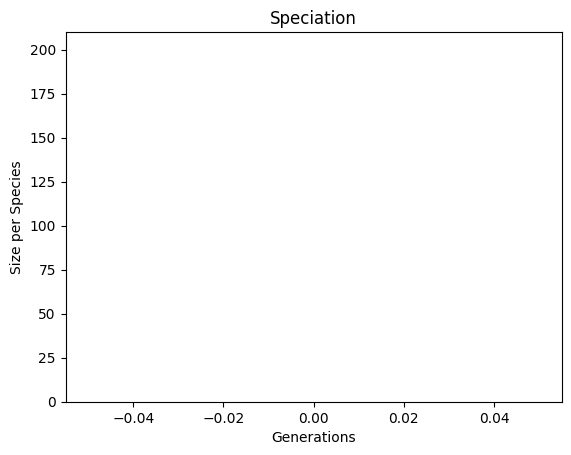

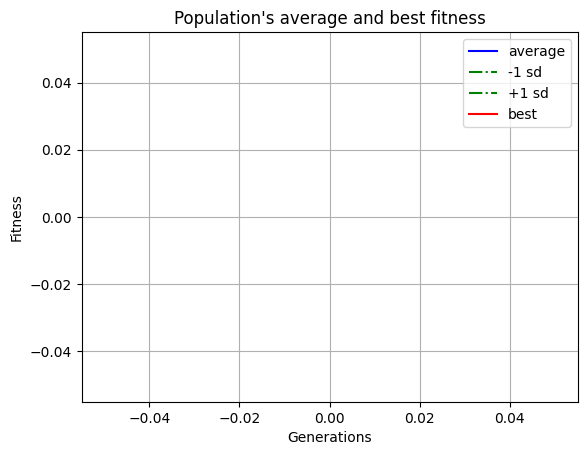

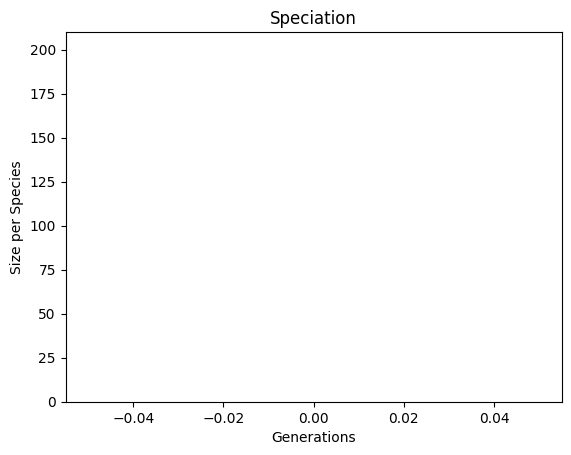

In [ ]:
# Render the best network

# Plot the statistics
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)